In [18]:
import numpy as np
import pandas as pd
import os
import os.path

import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# set working directory

os.chdir('/projects/mpi/shared/Data')
os.getcwd()

'/projects/mpi/shared/Data'

In [6]:
# grab sptialjoined files
!ls

all_cts.cpg		    la_qtid_ct.csv
all_cts.dbf		    la_tag.csv
all_cts.prj		    __MACOSX
all_cts.shp		    NewYork.geojson
all_cts.shx		    nyc_all.csv
Borough Boundaries	    ny_combine.csv
Boundaries - City.geojson   ny_ct_agg.csv
cellphone data 2	    ny_ct.csv
cellphone data 2.zip	    ny_qtid_ct.csv
CENSUS_TRACTS_2010.cpg	    SanFrancisco.geojson
CENSUS_TRACTS_2010.dbf	    sf_all.csv
CENSUS_TRACTS_2010.prj	    sf_combine.csv
CENSUS_TRACTS_2010.sbn	    sf_ct_agg.csv
CENSUS_TRACTS_2010.sbx	    sf_ct.csv
CENSUS_TRACTS_2010.shp	    sf_qtid_ct.csv
CENSUS_TRACTS_2010.shp.xml  sf_tag.csv
CENSUS_TRACTS_2010.shx	    shapefiles
chicago_all.csv		    tl_2015_06037_addrfeat.cpg
Chicago.geojson		    tl_2015_06037_addrfeat.dbf
chic_combine.csv	    tl_2015_06037_addrfeat.prj
chic_ct_agg.csv		    tl_2015_06037_addrfeat.shp
chic_ct.csv		    tl_2015_06037_addrfeat.shp.ea.iso.xml
chic_qtid_ct.csv	    tl_2015_06037_addrfeat.shp.iso.xml
la_all.csv		    tl_2015_06037_addrfeat.shp.xml
la_combine.csv		    tl_201

In [7]:
cts = gpd.read_file('all_cts.shp')

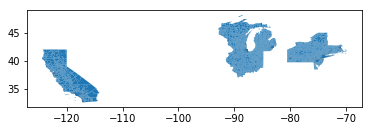

In [8]:
cts.plot()

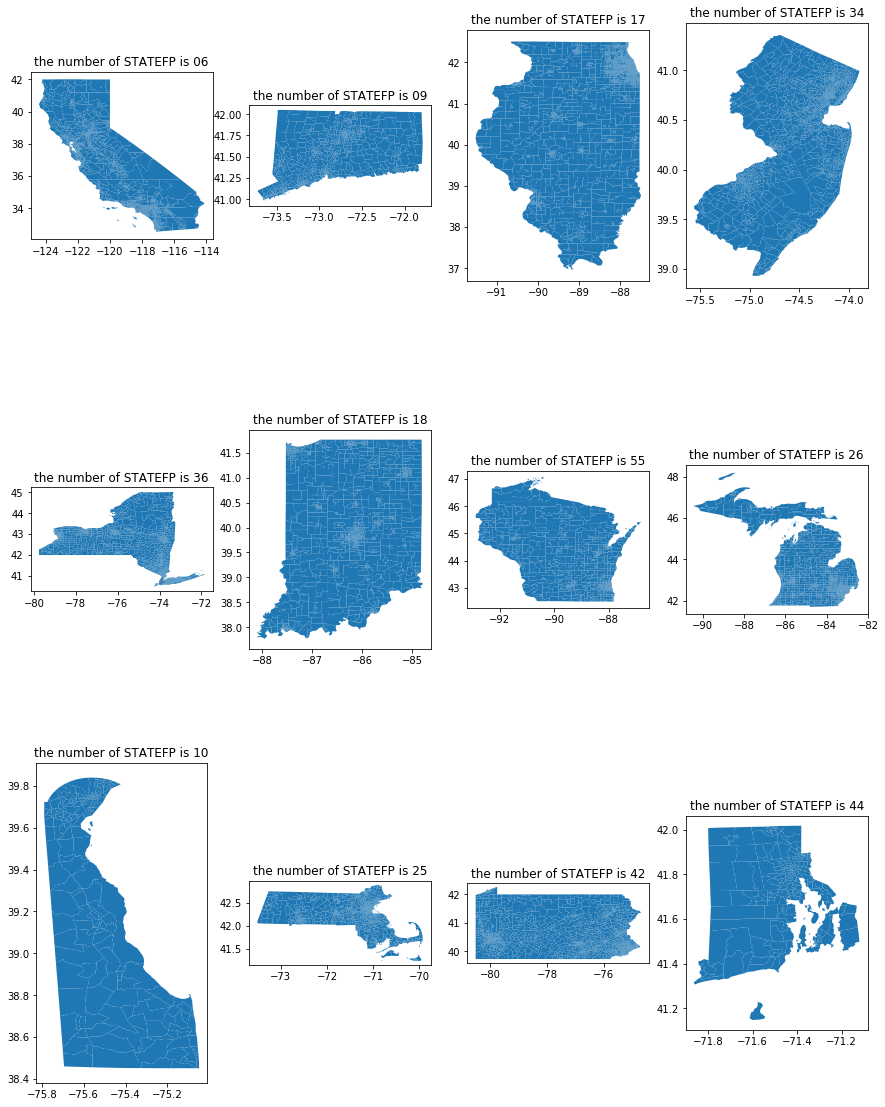

In [6]:
# find out which STATEFP is
fig= plt.figure(figsize = (15,20))
for i in range(len(cts.STATEFP.unique())):
    ax = fig.add_subplot(3,4,i+1)
    cts[cts['STATEFP']==cts.STATEFP.unique()[i]].plot(ax = ax)
    ax.set_title("the number of STATEFP is {0}".format(cts.STATEFP.unique()[i]))


In [7]:
cts.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,001,400600,1400000US06001400600,06001400600,4006,CT,297856,0,"POLYGON ((-122.26807 37.844136, -122.26514 37...."
1,06,001,400900,1400000US06001400900,06001400900,4009,CT,420877,0,"POLYGON ((-122.285576 37.839778, -122.283186 3..."
2,06,001,401400,1400000US06001401400,06001401400,4014,CT,758204,0,"POLYGON ((-122.278611 37.826878, -122.268563 3..."
3,06,001,403000,1400000US06001403000,06001403000,4030,CT,352394,0,"POLYGON ((-122.274757 37.79883299999999, -122...."
4,06,001,405902,1400000US06001405902,06001405902,4059.02,CT,487280,0,"POLYGON ((-122.247175 37.789913, -122.243512 3..."


In [8]:
# 06:'CA',09:'CT',17:'IL',34:'NJ',36:'NY',18:'IN',55:'WI',26:'MI',10:'DE',25:'MA',42:'PA',44:'RI'

# guessing
# la&sf -> dest 06:'CA' -- from ---- 06:'CA'
# ny -> dest 36:'NY' -- from ---- 09:'CT',34:'NJ',36:'NY',10:'DE',25:'MA',42:'PA',44:'RI'
# chic -> dest 17:'IL' -- from ---- 17:'IL',18:'IN',55:'WI',26:'MI'
cts.STATEFP.unique()

array(['06', '09', '17', '34', '36', '18', '55', '26', '10', '25', '42',
       '44'], dtype=object)

In [9]:
!ls

all_cts.cpg	      chicago_all.csv	la_ct.csv	sf_all.csv
all_cts.dbf	      chic_combine.csv	la_qtid_ct.csv	sf_combine.csv
all_cts.prj	      chic_ct_agg.csv	__MACOSX	sf_ct_agg.csv
all_cts.shp	      chic_ct.csv	nyc_all.csv	sf_ct.csv
all_cts.shx	      chic_qtid_ct.csv	ny_combine.csv	sf_qtid_ct.csv
Borough Boundaries    la_all.csv	ny_ct_agg.csv	shapefiles
cellphone data 2      la_combine.csv	ny_ct.csv
cellphone data 2.zip  la_ct_agg.csv	ny_qtid_ct.csv


In [32]:
chic = pd.read_csv('chic_ct.csv')
ny = pd.read_csv('ny_ct.csv')
la = pd.read_csv('la_ct.csv')
sf = pd.read_csv('sf_ct.csv')


chic.sort_values(by='dest_ct',inplace = True)
ny.sort_values(by='dest_ct',inplace = True)
la.sort_values(by='dest_ct',inplace = True)
sf.sort_values(by='dest_ct',inplace = True)

ny['origin_ct'] = ny['origin_ct'].astype(str)
ny['dest_ct'] = ny['dest_ct'].astype(str)
chic['origin_ct'] = chic['origin_ct'].astype(str)
chic['dest_ct'] = chic['dest_ct'].astype(str)
la['origin_ct'] = la['origin_ct'].astype(str)
la['dest_ct'] = la['dest_ct'].astype(str)
sf['origin_ct'] = sf['origin_ct'].astype(str)
sf['dest_ct'] = sf['dest_ct'].astype(str)

In [27]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6766506 entries, 45681 to 1425261
Data columns (total 7 columns):
origin_ct      object
dest_ct        object
time_period    object
origin_st      int64
dest_st        int64
od_counts      int64
num_dates      int64
dtypes: int64(4), object(3)
memory usage: 413.0+ MB


In [28]:
import math

list(set([math.floor(i) for i in  ny['dest_ct'].astype(float)/1e9]))

[34, 36, 9, 10, 42, 44, 25]

In [36]:
import math

list(set([math.floor(i) for i in  ny['dest_ct'].astype(float)/1e9]))

TypeError: 'int' object is not subscriptable

## Download census data

In [20]:
os.chdir('/projects/mpi/user/jl9200')

In [22]:
from census import Census
from us import states
import json
import urllib
from Census_API import api_key
import lxml
import html5lib
import requests


#### **Source: html version: https://api.census.gov/data/2016/acs/acs5/variables.html**

We will trying to get census data from the giving state [STATEFP] and all the county by the giving key.

Population key: B00002_001E [UNWEIGHTED SAMPLE HOUSING UNITS]

Median Household income: B19013_001E []

ALLOCATION OF PRIVATE VEHICLE OCCUPANCY : B99082_001E

Estimate!!Total!!Public transportation (excluding taxicab) : B08006_008E
    


step1. lookup the keys data and the STATEFE code

In [7]:
statecode = pd.read_html('https://www.mcc.co.mercer.pa.us/dps/state_fips_code_listing.htm',skiprows=0,header = 0)[0]
df1 = statecode.iloc[:,:3]
df2 = statecode.iloc[:,3:]
df2.columns = df1.columns
q = pd.concat([df1,df2],axis=0,ignore_index=True,sort=True).dropna()
q.sort_values(by='FIPS Code',inplace = True)
q['FIPS Code'] = q['FIPS Code'].astype(int)
q.set_index('FIPS Code',inplace=True)


In [26]:
import json

# look into the ACS 5yr data
# download 5 year census data 
url = "https://api.census.gov/data/2016/acs/acs5/variables.json"
resp = requests.request('GET',url)
aff5 = json.loads(resp.text)
aff5keys = list(aff5['variables'].keys())
aff5keys

['for',
 'in',
 'B24126_438E',
 'B20005E_045E',
 'B06004HPR_002E',
 'B02019_008E',
 'B25032C_006E',
 'B05007_065E',
 'B19056_002E',
 'B20001_017E',
 'B25087_019E',
 'B02019_009E',
 'B24126_439E',
 'B06004HPR_003E',
 'B20005E_044E',
 'B25032C_005E',
 'B08505A_001E',
 'B19056_001E',
 'B05007_066E',
 'B20001_016E',
 'B20001_014E',
 'B20005E_043E',
 'B02019_006E',
 'B06004HPR_004E',
 'B25032C_008E',
 'B24091_002E',
 'B25127_070E',
 'B05007_067E',
 'B20001_015E',
 'B20001_013E',
 'B25032C_007E',
 'B06004HPR_005E',
 'B20005E_042E',
 'B02019_007E',
 'B24091_001E',
 'B25127_071E',
 'B05007_068E',
 'B20005E_041E',
 'B18101I_009E',
 'B20001_012E',
 'B24126_434E',
 'B05007_069E',
 'B08505A_005E',
 'B25032C_009E',
 'B20005E_040E',
 'B20001_011E',
 'B24126_435E',
 'B08505A_006E',
 'B08505A_002E',
 'B24121_231E',
 'B24126_436E',
 'B20001_010E',
 'B08505A_003E',
 'B24121_230E',
 'B06004HPR_001E',
 'B24126_437E',
 'B08505A_004E',
 'B25087_011E',
 'B07401_006E',
 'B24121_233E',
 'B08519_026E',
 'B24091

In [8]:
censusMega = pd.read_html('https://api.census.gov/data/2016/acs/acs5/variables.html',skiprows=0)[0]
len(censusMega)

22856

In [9]:
censusMega2 = censusMega[censusMega['Label']=='Estimate!!Total']
len(censusMega2)

812

In [10]:
censusMega3 = censusMega2[~censusMega2['Group'].str[-1].str.isalpha()]
len(censusMega3)

491

In [ ]:
EMPLOYMENT

In [27]:
for i in censusMega3[censusMega3['Concept'].str.contains('POPULATION')]['Concept']:
    print(i)

UNWEIGHTED SAMPLE COUNT OF THE POPULATION
TOTAL POPULATION
PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION IN THE UNITED STATES
PLACE OF BIRTH BY YEAR OF ENTRY BY CITIZENSHIP STATUS FOR THE FOREIGN-BORN POPULATION
SEX BY PLACE OF BIRTH BY YEAR OF ENTRY FOR THE FOREIGN-BORN POPULATION
SEX BY AGE FOR THE FOREIGN-BORN POPULATION
SEX BY AGE FOR THE FOREIGN-BORN POPULATION
WORKER POPULATION FOR WORKPLACE GEOGRAPHY
POPULATION UNDER 18 YEARS BY AGE
RELATIONSHIP BY HOUSEHOLD TYPE (INCLUDING LIVING ALONE) FOR THE POPULATION 65 YEARS AND OVER
GRANDPARENTS LIVING WITH OWN GRANDCHILDREN UNDER 18 YEARS BY RESPONSIBILITY FOR OWN GRANDCHILDREN BY LENGTH OF TIME RESPONSIBLE FOR OWN GRANDCHILDREN FOR THE POPULATION 30 YEARS AND OVER
HOUSEHOLD TYPE BY RELATIVES AND NONRELATIVES FOR POPULATION IN HOUSEHOLDS
POPULATION IN SUBFAMILIES BY SUBFAMILY TYPE BY RELATIONSHIP
SEX BY MARITAL STATUS FOR THE POPULATION 15 YEARS AND OVER
SEX BY MARITAL STATUS BY AGE FOR THE POPULATION 15 YEARS AND OVER
MARRIAGES IN THE

In [28]:
censusMega3[censusMega3['Concept'].str.contains('POPULATION')]

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Values
4,B00001_001E,Estimate!!Total,UNWEIGHTED SAMPLE COUNT OF THE POPULATION,not required,B00001_001EA,0,int,B00001,NaN
364,B01003_001E,Estimate!!Total,TOTAL POPULATION,not required,"B01003_001M, B01003_001MA, B01003_001EA",0,int,B01003,NaN
1275,B05006_001E,Estimate!!Total,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,not required,"B05006_001M, B05006_001MA, B05006_001EA",0,int,B05006,NaN
1483,B05007_001E,Estimate!!Total,PLACE OF BIRTH BY YEAR OF ENTRY BY CITIZENSHIP...,not required,"B05007_001M, B05007_001MA, B05007_001EA",0,int,B05007,NaN
1589,B05008_001E,Estimate!!Total,SEX BY PLACE OF BIRTH BY YEAR OF ENTRY FOR THE...,not required,"B05008_001M, B05008_001MA, B05008_001EA",0,int,B05008,NaN
1737,B05013_001E,Estimate!!Total,SEX BY AGE FOR THE FOREIGN-BORN POPULATION,not required,"B05013_001M, B05013_001MA, B05013_001EA",0,int,B05013,NaN
1776,B05014_001E,Estimate!!Total,SEX BY AGE FOR THE FOREIGN-BORN POPULATION,not required,"B05014_001M, B05014_001MA, B05014_001EA",0,int,B05014,NaN
6237,B08604_001E,Estimate!!Total,WORKER POPULATION FOR WORKPLACE GEOGRAPHY,not required,"B08604_001M, B08604_001MA, B08604_001EA",0,int,B08604,NaN
6238,B09001_001E,Estimate!!Total,POPULATION UNDER 18 YEARS BY AGE,not required,"B09001_001M, B09001_001MA, B09001_001EA",0,int,B09001,NaN
6345,B09020_001E,Estimate!!Total,RELATIONSHIP BY HOUSEHOLD TYPE (INCLUDING LIVI...,not required,"B09020_001M, B09020_001MA, B09020_001EA",0,int,B09020,NaN


In [206]:
censusMega3[censusMega3['Concept'].str.contains('INCOME')]

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Values
1695,B05010_001E,Estimate!!Total,RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 1...,not required,"B05010_001M, B05010_001MA, B05010_001EA",0,int,B05010,NaN
2245,B06010_001E,Estimate!!Total,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,not required,"B06010_001M, B06010_001MA, B06010_001EA",0,int,B06010,NaN
2957,B07010_001E,Estimate!!Total,GEOGRAPHICAL MOBILITY IN THE PAST YEAR BY INDI...,not required,"B07010_001M, B07010_001MA, B07010_001EA",0,int,B07010,NaN
6286,B09010_001E,Estimate!!Total,"RECEIPT OF SUPPLEMENTAL SECURITY INCOME (SSI),...",not required,"B09010_001M, B09010_001MA, B09010_001EA",0,int,B09010,NaN
7578,B13015_001E,Estimate!!Total,WOMEN 15 TO 50 YEARS WHO HAD A BIRTH IN THE PA...,not required,"B13015_001M, B13015_001MA, B13015_001EA",0,int,B13015,NaN
9979,B17015_001E,Estimate!!Total,POVERTY STATUS IN THE PAST 12 MONTHS OF FAMILI...,not required,"B17015_001M, B17015_001MA, B17015_001EA",0,int,B17015,NaN
10395,B17022_001E,Estimate!!Total,RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 1...,not required,"B17022_001M, B17022_001MA, B17022_001EA",0,int,B17022,NaN
10511,B17024_001E,Estimate!!Total,AGE BY RATIO OF INCOME TO POVERTY LEVEL IN THE...,not required,"B17024_001M, B17024_001MA, B17024_001EA",0,int,B17024,NaN
10657,B17026_001E,Estimate!!Total,RATIO OF INCOME TO POVERTY LEVEL OF FAMILIES I...,not required,"B17026_001M, B17026_001MA, B17026_001EA",0,int,B17026,NaN
11044,B19001_001E,Estimate!!Total,HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 201...,not required,"B19001_001M, B19001_001MA, B19001_001EA",0,int,B19001,NaN


step2. get census data

In [37]:
import math
# list(set([math.floor(i) for i in  ny['dest_ct']/1e9]))

statelist = {'ny':list(set([math.floor(i) for i in  ny['dest_ct'].astype(float)/1e9])),
            'chic':list(set([math.floor(i) for i in  chic['dest_ct'].astype(float)/1e9])),
            'la':list(set([math.floor(i) for i in  la['dest_ct'].astype(float)/1e9])),
            'sf':list(set([math.floor(i) for i in  sf['dest_ct'].astype(float)/1e9]))}
statelist

{'ny': [34, 36, 9, 10, 42, 44, 25],
 'chic': [17, 18, 26, 55],
 'la': [6],
 'sf': [6]}

In [38]:
'%.2f' % 0.2
for i in range(len(statelist['ny'])):
    print (str('%.2f' % float(statelist['ny'][i]/100)).split('.')[1])

AttributeError: 'int' object has no attribute 'astype'

In [39]:
keylist = {'B00002_001E':'pop',
           'B19013_001E':'medianincome',
           'B99082_001E':'vehicle_occupancy',
           'B08015_001E':'AggregateVehiclesInCommuting',
           'B08006_008E':'publictransport',
           'B06009_005E':'Bachelordegree',
           'B10059_002E':'pastYearbelowPovertyLevel100',
           'B07001_033E':'Movedwithinsamecounty',
           'B07001_081E':'Movedfromabroad',
           'B992703_001E':'AllocationPublicHealthInsurance'}

#fip_list = ['005', '047', '061', '081', '085'] #BX, BK, MN, QN, SI
cities = ['ny','chic','la','sf']
def get_Census_Key(city,keylist):
    c = Census(api_key)
    df_city=[]

    for i in range(len(statelist[city])):
        print(str('%.2f' % float(statelist[city][i]/100)).split('.')[1])
        dff = []
        for j in keylist.keys():
            df = c.acs.state_county_tract(('NAME',j),str('%.2f' % float(statelist[city][i]/100)).split('.')[1],'*',Census.ALL,year=2016)
            df = pd.DataFrame(df)
            #df.rename(index = str,columns={j:keylist[j]},inplace=True)
            dff.append(df)
        dffs = pd.concat(dff,axis=1)
        df_city.append(dffs)
    df_cities = pd.concat(df_city,axis=0)
    dffall = df_cities.loc[:,~df_cities.columns.duplicated()]
    dffall = dffall.reindex(sorted(dffall.columns),axis=1)
    return dffall
def makeDF(city,keylist):
    df = get_Census_Key(city,keylist)
    df.columns =[keylist[i] if i in keylist.keys() else i for i in df.columns]
    df['GEOID'] = df['state']+df['county']+df['tract']
    return df

ny_census = makeDF('ny',keylist)
chic_census = makeDF('chic',keylist)
la_census = makeDF('la',keylist)
sf_census = makeDF('sf',keylist)

34
36
09
10
42
44
25
17
18
26
55
06
06


In [40]:
sf_census.head()

,pop,Bachelordegree,Movedwithinsamecounty,Movedfromabroad,publictransport,AggregateVehiclesInCommuting,pastYearbelowPovertyLevel100,medianincome,vehicle_occupancy,AllocationPublicHealthInsurance,NAME,county,state,tract,GEOID
0,144.0,781.0,267.0,20.0,182.0,945.0,0.0,177417.0,1550.0,3018.0,"Census Tract 4001, Alameda County, California",001,06,400100,06001400100
1,144.0,557.0,77.0,37.0,317.0,605.0,0.0,153125.0,1223.0,1960.0,"Census Tract 4002, Alameda County, California",001,06,400200,06001400200
2,144.0,1332.0,198.0,30.0,892.0,1455.0,0.0,85313.0,3089.0,5236.0,"Census Tract 4003, Alameda County, California",001,06,400300,06001400300
3,172.0,1123.0,165.0,7.0,660.0,935.0,0.0,99539.0,2367.0,4165.0,"Census Tract 4004, Alameda County, California",001,06,400400,06001400400
4,148.0,1053.0,297.0,10.0,566.0,1095.0,0.0,83650.0,2327.0,3748.0,"Census Tract 4005, Alameda County, California",001,06,400500,06001400500


In [1]:
len(cts)

NameError: name 'cts' is not defined

step3. aggreagate census and od-pair data

In [234]:
ny_combine = ny.merge(ny_census,left_on='dest_ct',right_on='GEOID')
la_combine = la.merge(la_census,left_on='dest_ct',right_on='GEOID')
sf_combine = sf.merge(sf_census,left_on='dest_ct',right_on='GEOID')
chic_combine = chic.merge(chic_census,left_on='dest_ct',right_on='GEOID')

In [236]:
ny_combine.to_csv('ny_combine.csv')
chic_combine.to_csv('chic_combine.csv')
la_combine.to_csv('la_combine.csv')
sf_combine.to_csv('sf_combine.csv')